## Gaussian Bayesian Estimation 

The posterior is equal to likelihood times prior:

$ P(\bf{W}\mid \hat{\bf{y}},\bf{x}) = P(\hat{\bf{y}}\mid \bf{x},\bf{W})P(\bf{W}\mid \bf{\mu},\bf{\sigma}^{2}_0)$

Let’s use Gaussian prior for weight W:

$P(\bf{W}\mid \bf{\mu},\bf{\sigma}^{2}_0) = \mathcal{N}_y(0,\sigma_y^{2}) \quad {\displaystyle \propto }\quad\exp(- {\bf{W}}/{2\sigma}^{2}_0)$

Then, the posterior is derived as follows:

$\begin{align*} P(\bf{W}\mid \hat{\bf{y}},\bf{x}) &= P(\hat{\bf{y}}\mid \bf{x},\bf{W})P(\bf{W}\mid \bf{\mu},\bf{\sigma}^{2}_0)\\
	&\propto \exp\left(- \frac{(\hat{\bf{y}}-\bf{W}^{\top}\bf{x})^{2}}{2\sigma^{2} } \right)\exp\left(- \frac{\bf{W}}{2\sigma_0^{2}}^{2}\right)\end{align*}$
    
Resulting in the following log posterior:

$\begin{align*} \ln P(\bf{W}\mid \hat{\bf{y}},\bf{x})  &\propto   - \frac{(\hat{\bf{y}}-\bf{W}^{\top}\bf{x})^{2}}{2\sigma }   - \frac{\bf{W}}{2\sigma_0}^{2} \\
& = \frac{1}{2\sigma^{2}}\mid\mid\hat{\bf{y}}-\bf{W}^{\top}\bf{x} \mid\mid^{2}_2- \frac{1}{2\sigma_0^{2}}\mid\mid\bf{W}\mid\mid^{2}_2 \\
&\propto \frac{1}{2\sigma^{2}}\mid\mid\hat{\bf{y}}-\bf{W}^{\top}\bf{x} \mid\mid^{2}_2- \frac{\lambda}{2}\mid\mid\bf{W}\mid\mid^{2}_2
\end{align*}$

The log posterior of Gaussian likelihood and Gaussian prior is the same as the objective function for Ridge Regression. Hence, Gaussian prior is equal to ℓ2 regularization.


In [1]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.linear_model import BayesianRidge, LinearRegression

# #############################################################################
# Generating simulated data with Gaussian weights
np.random.seed(0)
n_samples, n_features = 300, 100
X = np.random.randn(n_samples, n_features)  # Create Gaussian data
# https://scikit-learn.org/stable/modules/linear_model.html#bayesian-ridge-regression

Automatically created module for IPython interactive environment



The prior for the coefficient  is given by a spherical Gaussian: $p(w|\lambda) =
\mathcal{N}(w|0,\lambda^{-1}\mathbf{I}_{p})$

Weights are created with a precision lambda_ of 4.

In [2]:
lambda_ = 4.
w = np.zeros(n_features)
# Only keep 10 weights of interest
relevant_features = np.random.randint(0, n_features, 10)
for i in relevant_features:
    w[i] = stats.norm.rvs(loc=0, scale=1. / np.sqrt(lambda_))
    
# Create noise with a precision alpha of 50.
alpha_ = 50.
noise = stats.norm.rvs(loc=0, scale=1. / np.sqrt(alpha_), size=n_samples)
# Create the target
y = np.dot(X, w) + noise

# #############################################################################
# Fit the Bayesian Ridge Regression and an OLS for comparison
clf = BayesianRidge(compute_score=True)
clf.fit(X, y)

ols = LinearRegression()
ols.fit(X, y)

LinearRegression()

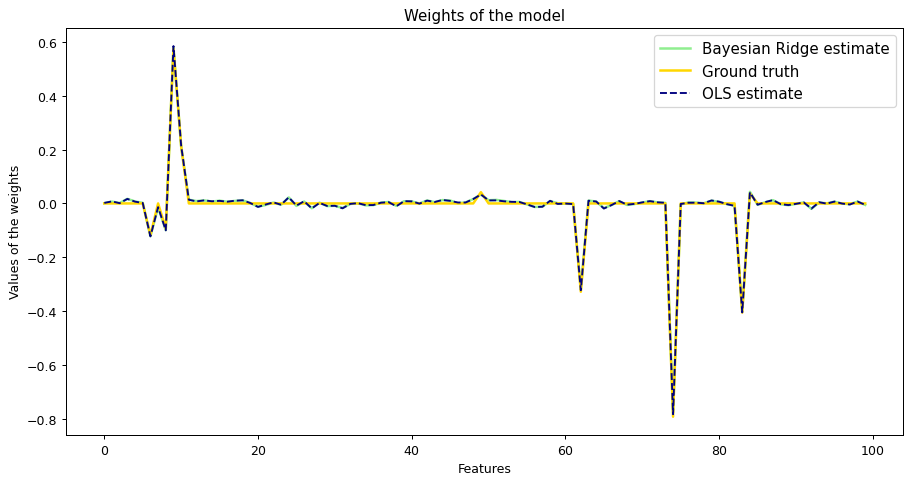

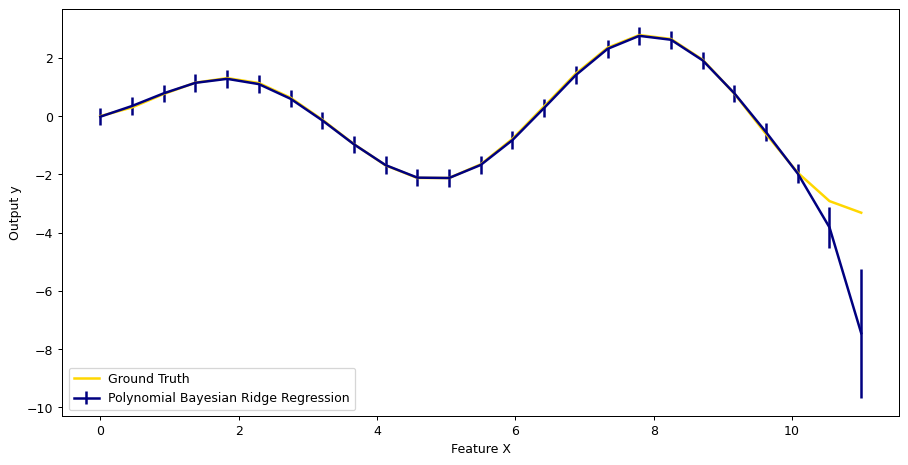

In [4]:
# #############################################################################
# Plot true weights, estimated weights, histogram of the weights, and
# predictions with standard deviations
lw = 2
plt.figure(figsize=(12, 6), dpi=90)
plt.title("Weights of the model")
plt.plot(clf.coef_, color='lightgreen', linewidth=lw,
         label="Bayesian Ridge estimate")
plt.plot(w, color='gold', linewidth=lw, label="Ground truth")
plt.plot(ols.coef_, color='navy', linestyle='--', label="OLS estimate")
plt.xlabel("Features")
plt.ylabel("Values of the weights")
plt.legend(loc="best", prop=dict(size=12))
plt.show() 

# Plotting some predictions for polynomial regression
def f(x, noise_amount):
    y = np.sqrt(x) * np.sin(x)
    noise = np.random.normal(0, 1, len(x))
    return y + noise_amount * noise

degree = 10
X = np.linspace(0, 10, 100)
y = f(X, noise_amount=0.1)
clf_poly = BayesianRidge()
clf_poly.fit(np.vander(X, degree), y)

X_plot = np.linspace(0, 11, 25)
y_plot = f(X_plot, noise_amount=0)
y_mean, y_std = clf_poly.predict(np.vander(X_plot, degree), return_std=True)
plt.figure(figsize=(12, 6), dpi=90)
plt.errorbar(X_plot, y_mean, y_std, color='navy',
             label="Polynomial Bayesian Ridge Regression", linewidth=lw)
plt.plot(X_plot, y_plot, color='gold', linewidth=lw,
         label="Ground Truth")
plt.ylabel("Output y")
plt.xlabel("Feature X")
plt.legend(loc="lower left")
plt.show()